In [1]:
import numpy as np
import pandas as pd

import ipywidgets as widgets
from IPython.display import display, Math

import dtmc
import mcviz

Loading BokehJS ...

# DTMC: Section 4 - The Ride-Share Driver

We will consider a (slightly) different DTMC model and introduce the idea of unconditional probability distributions for $X_n$ and the stationary distribution.

## Model Setting

Suppose you are driving for a ride-share service (e.g., Uber, Lyft) in the Miami area.  Starting in your home neighborhood, you pick up a passenger and drive to her destination and drop her off.  Your next pick-up is in the same neighborhood as your previous drop-off, drive to that passenger's destination and drop him off, and repeat.

What is the probability you end up back in Coral Gables after 30 passengers?

**Assumptions**

* Simplify the Miami area to four neighborhoods:
    1. Coral Gables
    2. Kendall
    3. Downtown
    4. Miami Beach


* You always pick-up the next passenger in the same neighborhood as your previous drop-off.  (That is, you don't choose to go to a different neighborhood without a passenger.)

* The destination of any passenger is random and
    * the distribution is known
    * it depends on the passenger's pick-up location
    * but does not depend on any previous passenger's pick-up or drop-off

<IPython.core.display.Math object>

<IPython.core.display.Math object>

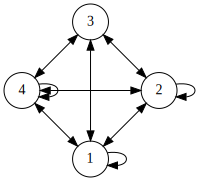

In [2]:
S = [1, 2, 3, 4]
P = np.array([[0.3, 0.2, 0.4, 0.1],
              [0.4, 0.1, 0.4, 0.1],
              [0.7, 0.2, 0, 0.1],
              [0.5, 0.3, 0.1, 0.1]
             ])
names = ['Gables', 'Kendall', 'Downtown', 'Beach']
dtmc.disp_dtmc(P, S)
display(mcviz.dot_mc(P, S, bidir=True, self_edge=True))

### Exercise 4.1

Using the transition probability matrix $\mathbf{P}$ above and given that you start (pick up your first passenger) in Coral Gables, what is the probability that:
* you drop off your first passenger in Coral Gables?  Kendall?  Downtown?  Miami Beach?
* you drop off your tenth passenger in Downtown?
* you end up back in Coral Gables after 30 passengers?

## Initial Distribution and Unconditional Probabilities

So far, we've only looked at conditional probabilities that were elements of the $m$-step transition probability matrix, such as:

$$ p_{13}^{(10)} = \mathsf{P}(X_{10} = 3 \,|\, X_0 = 1) $$

However, if we assume a probability distribution for $X_0$ (a distribution over $\mathcal{S}$) we can calculate unconditional probability distribution of every $X_n$, $n \geq 1$.

### Distribution Over $\mathcal{S}$

Remember that each step in the stochastic process is a random variable $X_n$ so it has a probability distribution over the state space $\mathcal{S}$.  Since $\mathcal{S}$ is discrete, this will be a discrete distribution.  Instead of a probability mass function, we will write the distribution of $X_n$ as a *vector* $\mathbf{d}_n$ where the $i$th element of the vector is $\mathsf{P}(X_n = i)$.  (You can think of this as a probability mass vector instead of a probability mass function.)

$$ \mathbf{d}_n = \begin{pmatrix} \mathsf{P}(X_n = 1) & \mathsf{P}(X_n = 2) & \mathsf{P}(X_n = 3) & \mathsf{P}(X_n = 4) \end{pmatrix} $$

For example, the probability distribution for $X_0$ for the state space $\mathcal{S} = \{1, 2, 3, 4\}$ may be $\mathsf{P}(X_0 = i) = 1/4$ for all $i \in \mathcal{S}$ (so $X_0$ is uniformly distributed over $\mathcal{S}$) in which case the vector is

$$ \mathbf{d}_0 = \begin{pmatrix} 1/4 & 1/4 & 1/4 & 1/4 \end{pmatrix} $$

Another distribution for $X_0$ could be

$$ \mathbf{d}_0 = \begin{pmatrix} 1 & 0 & 0 & 0 \end{pmatrix} $$

which corresponds to starting in state $1$ with probability $1$.

Any vector that represents a distribution must have non-negative elements that sum to 1.

### Unconditional Probabilities

To get unconditional probabilities, we simply condition on $X_0$:

$$\mathsf{P}(X_1 = j) = \sum_{i \in \mathcal{S}} \mathsf{P}(X_1 = j \,|\, X_0 = i) \mathsf{P}(X_0 = i)$$

or in matrix and vector notation

$$\mathbf{d}_1 = \mathbf{d}_0 \mathbf{P}.$$

In general

$$\mathbf{d}_n = \mathbf{d}_{n-1} \mathbf{P} = \mathbf{d}_0 \mathbf{P}^n = \mathbf{d}_0 \mathbf{P}^{(n)}.$$

We can think of $\mathbf{d}_n$ as the (probabilistic) state of the system at time $n$ and the transition probability matrix $\mathbf{P}$ as “propogating” the system one step forward in time (and $\mathbf{d}_0$ is the initial condition).  It is in this way that $\mathbf{P}$ defines the dynamics of the Markov chain.  (In the same way that a dynamics of a projectile can be defined by a differential equation or a quantum mechanical wavefunction can be defined by the Schrödinger equation.)

### Exercise 4.2

For $\mathbf{d}_0 = \begin{pmatrix} 1 & 0 & 0 & 0 \end{pmatrix}$ calculate $\mathbf{d}_5$, $\mathbf{d}_{10}$, and $\mathbf{d}_{20}$ and interpret each distribution.

Please don't do this by hand.  You may use any matrix multiplication software you like (e.g., R, MATLAB, Python, Mathematica, a fancy calculator).  

If you want to use Python (and Numpy), the relevant functions are [`dot`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html) and [`matrix_power`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.matrix_power.html) (and remember we imported the `numpy` package as `np`, so you would write `np.dot` and `np.linalg.matrix_power` to use these functions).

### Exercise 4.3

Pick any (valid) distribution for $\mathbf{d}_0$ and calculate $\mathbf{d}_{20}$.  What do you notice?  Try changing $\mathbf{d}_0$ and calculate $\mathbf{d}_{20}$ again.

Calculate $\mathbf{P}^{(20)}$.  How does that explain your result?  What does this tell you about $\mathbf{P}^{(m)}$ for $m \geq 20$?

What does this mean in the setting of this problem?  Is that surprising?

### Exercise 4.4

Find a distribution (vector) $\pi$ that satisfies

$$ \pi = \pi \mathbf{P} $$

$\pi$ is known as the “stationary distribution.”  Why do you think it has this name?

*Hint:* Look at your results for Exercise 4.3.

**Note:** In this course, we will never use $\pi$ to denote the mathematical constant.  Instead, $\pi$ will almost always denote the stationary distribution of a Markov chain.

In [ ]:
pi = [0.25, 0.25, 0.25, 0.25] # Input your answer here
np.dot(pi, P) # Check that it satisifes pi = pi P